In [1]:
import json


# 读取数据
with open("../xfdata/dataset/job_list.json", "r", encoding="utf-8") as f:
    job_list = json.load(f)
with open("../xfdata/dataset/train.json", "r", encoding="utf-8") as f:
    train = json.load(f)
with open("../xfdata/dataset/test.json", "r", encoding="utf-8") as f:
    test = json.load(f)
    
# 1、教育经历
with open("../user_data/profileEduExps_sentences.json", "r", encoding="utf-8") as f:
    profileEduExps_sentences = json.load(f)

# 2、社会经历
with open("../user_data/profileSocialExps_sentences.json", "r", encoding="utf-8") as f:
    profileSocialExps_sentences = json.load(f)

# 3、项目经历
with open("../user_data/profileProjectExps_sentences.json", "r", encoding="utf-8") as f:
    profileProjectExps_sentences = json.load(f)

# 4、工作经历
with open("../user_data/profileWorkExps_sentences.json", "r", encoding="utf-8") as f:
    profileWorkExps_sentences = json.load(f)

# 5、技能
with open("../user_data/profileSkills_sentences.json", "r", encoding="utf-8") as f:
    profileSkills_sentences = json.load(f)

# 6、荣誉
with open("../user_data/profileAwards_sentences.json", "r", encoding="utf-8") as f:
    profileAwards_sentences = json.load(f)

# 7、求职意愿
with open("../user_data/profileDesire_sentences.json", "r", encoding="utf-8") as f:
    profileDesire_sentences = json.load(f)

# 8、语言
with open("../user_data/profileLanguage_sentences.json", "r", encoding="utf-8") as f:
    profileLanguage_sentences = json.load(f)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 获取标签
labels = [i["positionID"] for i in train]
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)
print(len(np.unique(labels)))

51


In [3]:
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig

path = "../user_data/output/checkpoint-132800"
config = BertConfig.from_pretrained(path)
config.num_labels = 51
model = BertForSequenceClassification.from_pretrained(path, config=config)
tokenizer = BertTokenizer.from_pretrained(path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ../user_data/output/checkpoint-132800 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


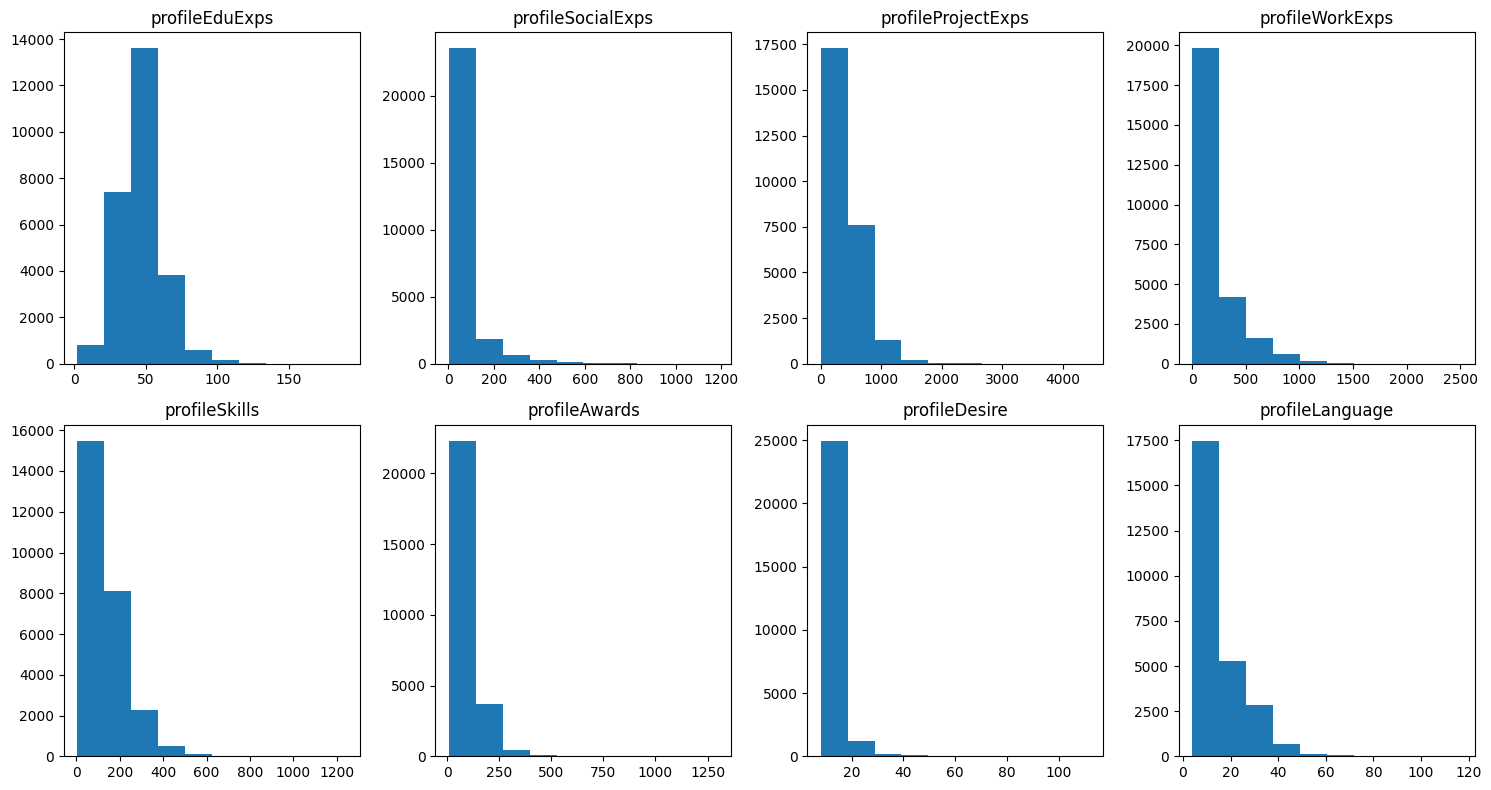

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
plt.subplot(2, 4, 1)
plt.hist([len(i) for i in profileEduExps_sentences])
plt.title("profileEduExps")
plt.subplot(2, 4, 2)
plt.hist([len(i) for i in profileSocialExps_sentences])
plt.title("profileSocialExps")
plt.subplot(2, 4, 3)
plt.hist([len(i) for i in profileProjectExps_sentences])
plt.title("profileProjectExps")
plt.subplot(2, 4, 4)
plt.hist([len(i) for i in profileWorkExps_sentences])
plt.title("profileWorkExps")
plt.subplot(2, 4, 5)
plt.hist([len(i) for i in profileSkills_sentences])
plt.title("profileSkills")
plt.subplot(2, 4, 6)
plt.hist([len(i) for i in profileAwards_sentences])
plt.title("profileAwards")
plt.subplot(2, 4, 7)
plt.hist([len(i) for i in profileDesire_sentences])
plt.title("profileDesire")
plt.subplot(2, 4, 8)
plt.hist([len(i) for i in profileLanguage_sentences])
plt.title("profileLanguage")
plt.tight_layout()
plt.show()

# 仅使用profileEduExps

In [5]:
# from sklearn.model_selection import train_test_split


# train_idx, valid_idx = train_test_split(np.arange(20000), test_size=0.2, random_state=42)
# np.save("../user_data/train_idx.npy", train_idx)
# np.save("../user_data/valid_idx.npy", valid_idx)

In [6]:
sentences = []
# for s1, s2, s3, s4, s5, s6, s7, s8 in zip(profileEduExps_sentences, profileSocialExps_sentences, profileProjectExps_sentences, \
# profileWorkExps_sentences, profileSkills_sentences, profileAwards_sentences, profileDesire_sentences, \
# profileLanguage_sentences):
#     sentences.append(s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8)

# 调整位置
for s1, s2, s3, s4, s5, s6, s7, s8 in zip(profileEduExps_sentences, profileWorkExps_sentences, profileProjectExps_sentences, \
profileSocialExps_sentences, profileSkills_sentences, profileAwards_sentences, profileDesire_sentences, \
profileLanguage_sentences):
    sentences.append(s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8)

In [7]:
train_sentences, test_sentences = sentences[: len(train)], sentences[len(train): ]
print(len(train_sentences), len(test_sentences))
# train_idx = np.load("../user_data/train_idx.npy")
# valid_idx = np.load("../user_data/valid_idx.npy")
# train_sentences, valid_sentences = [train_sentences[idx] for idx in train_idx], [train_sentences[idx] for idx in valid_idx]
# train_labels, valid_labels = [labels[idx] for idx in train_idx], [labels[idx] for idx in valid_idx]
# print(len(train_sentences), len(train_labels))
# print(len(valid_sentences), len(valid_labels))

20000 6500


In [8]:
from datasets import Dataset


train_dataset = Dataset.from_dict({
    "text": train_sentences,
    # "label": train_labels
    "label": labels
})
# valid_dataset = Dataset.from_dict({
#     "text": valid_sentences,
#     "label": valid_labels
# })
test_dataset = Dataset.from_dict({
    "text": test_sentences
})

In [9]:
def preprocess(examples):
    """单个处理"""
    input_ids, token_type_ids, attention_mask = tokenizer.encode_plus(
        examples["text"],
        padding="max_length",
        # max_length=512,
        max_length=1024,
        truncation=True,
        return_tensors="pt"
    ).values()
    examples["input_ids"] = input_ids[0]
    examples["token_type_ids"] = token_type_ids[0]
    examples["attention_mask"] = attention_mask[0]
    return examples


train_encoded = train_dataset.map(preprocess)
# valid_encoded = valid_dataset.map(preprocess)
test_encoded = test_dataset.map(preprocess)

train_encoded.set_format("torch", columns=["label", "input_ids", "token_type_ids", "attention_mask"])
# valid_encoded.set_format("torch", columns=["label", "input_ids", "token_type_ids", "attention_mask"])
test_encoded.set_format("torch", columns=["input_ids", "token_type_ids", "attention_mask"])

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/6500 [00:00<?, ? examples/s]

In [11]:
from transformers import Trainer, TrainingArguments


training_args = TrainingArguments(
    output_dir="../user_data/profileEduExpsclassification_output",  # 输出目录
    overwrite_output_dir=True,                         # 是否覆盖输出目录
    num_train_epochs=6,                               # 训练轮数
    per_device_train_batch_size=64,                    # 每个设备的批次大小
    per_device_eval_batch_size=8,                     # 每个设备的评估批次大小
    warmup_steps=500,                                 # 预热步数
    weight_decay=0.01,                                # 权重衰减
    logging_dir='../user_data/profileEduExpsclassification_logs',   # 日志保存路径
    logging_strategy="epoch",                                # 每 10 步记录一次日志
    # eval_strategy="epoch",                            # 每个 epoch 进行评估
    save_strategy="epoch",                            # 每个 epoch 保存模型
    # load_best_model_at_end=True,                      # 在训练结束时加载最佳模型
    # greater_is_better=False,                           # 指标越高越好
    save_total_limit=3,                               # 最多保留3个模型
)

In [13]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encoded,
    # eval_dataset=valid_encoded,
    tokenizer=tokenizer
)
trainer.train()

Step,Training Loss
313,2.553900
626,1.596400
939,1.368000
1252,1.206100
1565,1.060000
1878,0.948700


TrainOutput(global_step=1878, training_loss=1.4555173148743261, metrics={'train_runtime': 1410.565, 'train_samples_per_second': 85.072, 'train_steps_per_second': 1.331, 'total_flos': 3.181995712512e+16, 'train_loss': 1.4555173148743261, 'epoch': 6.0})

In [14]:
# 训练完成后，获取最佳模型的路径
# best_model_path = trainer.state.best_model_checkpoint
# print(f"Best model checkpoint path: {best_model_path}")

In [15]:
from sklearn.metrics import f1_score


result = trainer.predict(train_encoded)
print(f1_score(result.label_ids, result.predictions.argmax(axis=1), average="macro"))
# result = trainer.predict(valid_encoded)
# print(f1_score(result.label_ids, result.predictions.argmax(axis=1), average="macro"))
result = trainer.predict(test_encoded)
y_pred = result.predictions
# np.save("../user_data/pred_matrix/profileEduExps.npy", y_pred)

0.5094427184204455


In [18]:
import numpy as np


df_submit = pd.read_csv("../xfdata/example.csv")
df_submit["positionID"] = labelencoder.inverse_transform(y_pred.argmax(axis=1))
df_submit.to_csv("../prediction_result/BERT_long.csv", index=False)

In [29]:
# result = trainer.predict(train_encoded)
result_test = trainer.predict(test_encoded)

In [41]:
pd.Series(result.label_ids).value_counts()

15    3619
14    2253
8     1562
11    1479
6     1051
26    1007
17     968
20     719
50     680
18     576
23     489
7      477
27     417
37     375
19     342
10     286
0      269
38     252
16     220
49     211
29     169
47     163
40     162
35     158
45     118
9      116
13     116
2      115
43     110
22     110
3       87
36      85
12      85
4       80
46      78
31      76
28      72
44      72
41      71
48      70
5       70
42      69
39      67
21      65
1       57
32      56
30      56
24      51
25      50
34      48
33      46
Name: count, dtype: int64

In [40]:
pd.Series(result_test.predictions.argmax(axis=1)).value_counts().sort_index()

0       17
3       39
4       13
5        8
6      305
7      135
8      596
9       40
10      94
11     622
14     888
15    1283
16      83
17     361
18     195
19     104
20     224
21       4
22       1
23     210
24      23
25      17
26     440
27     142
28      25
29       6
31      33
35      58
36      32
37     157
38      27
40      82
41      10
42      23
43      15
44       7
45      31
46      29
47      52
49       4
50      65
Name: count, dtype: int64